### Linear Curve Fitting Using SciPy: BOD vs Time

We fit the model:

$$
\text{BOD} = a_0 + a_1 \cdot t
$$

using least squares regression with `scipy.optimize.curve_fit`. We report:

- Estimated parameters $a_0$, $a_1$
- 95% confidence intervals
- Coefficient of determination $R^2$ and adjusted $R^2$
- Root mean square deviation (RMSD)
- Residual variance

The fitted curve is plotted in red, and the original data in blue circles.

Ref: https://www.polymathplus.org/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

In [3]:
# Data
t_data = np.array([1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
B_data = np.array([0.6, 0.7, 1.5, 1.9, 2.1, 2.6, 2.9, 3.7, 3.5, 3.7, 3.8])

# Linear model: BOD = a0 + a1 * t
def linear_model(t, a0, a1):
    return a0 + a1 * t

In [4]:
# Fit model
popt, pcov = curve_fit(linear_model, t_data, B_data)
a0, a1 = popt

# Degrees of freedom
n = len(t_data)
p = len(popt)
dof = n - p

# Standard errors and confidence intervals
stderr = np.sqrt(np.diag(pcov))
alpha = 0.05
tval = t.ppf(1 - alpha/2, dof)
ci_a0 = (a0 - tval * stderr[0], a0 + tval * stderr[0])
ci_a1 = (a1 - tval * stderr[1], a1 + tval * stderr[1])

# Residuals and metrics
B_pred = linear_model(t_data, *popt)
residuals = B_data - B_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((B_data - np.mean(B_data))**2)
r2 = 1 - ss_res / ss_tot
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p)
rmsd = np.sqrt(ss_res / dof)
variance = ss_res / dof

In [5]:
print("Linear Fit Results (SciPy):")
print(f"  a0 (intercept)     = {a0:.4f}")
print(f"  a1 (slope)         = {a1:.4f}")
print(f"  95% CI for a0      = [{ci_a0[0]:.4f}, {ci_a0[1]:.4f}]")
print(f"  95% CI for a1      = [{ci_a1[0]:.4f}, {ci_a1[1]:.4f}]")
print(f"  R²                 = {r2:.4f}")
print(f"  Adjusted R²        = {r2_adj:.4f}")
print(f"  RMSD               = {rmsd:.4f}")
print(f"  Residual Variance  = {variance:.4f}")

Linear Fit Results (SciPy):
  a0 (intercept)     = 0.6578
  a1 (slope)         = 0.1781
  95% CI for a0      = [0.2829, 1.0327]
  95% CI for a1      = [0.1464, 0.2097]
  R²                 = 0.9473
  Adjusted R²        = 0.9414
  RMSD               = 0.2873
  Residual Variance  = 0.0825


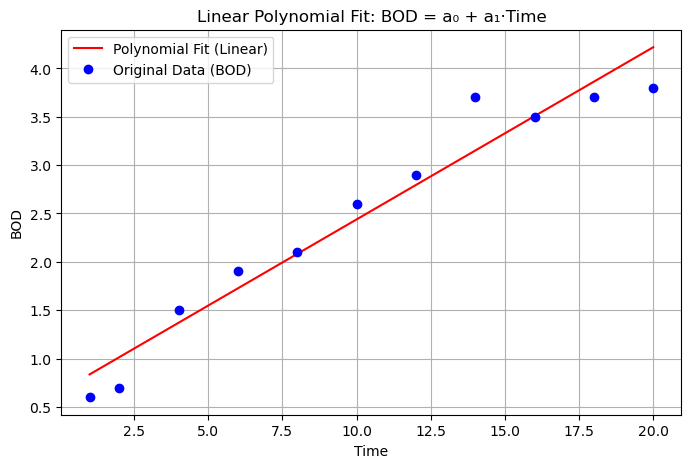

In [6]:
# Generate smooth fit line
t_fit = np.linspace(min(t_data), max(t_data), 200)
B_fit = linear_model(t_fit, *popt)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(t_fit, B_fit, color='red', label='Polynomial Fit (Linear)')
plt.plot(t_data, B_data, 'o', color='blue', label='Original Data (BOD)')
plt.xlabel('Time')
plt.ylabel('BOD')
plt.title('Linear Polynomial Fit: BOD = a₀ + a₁·Time')
plt.grid(True)
plt.legend()
plt.show()

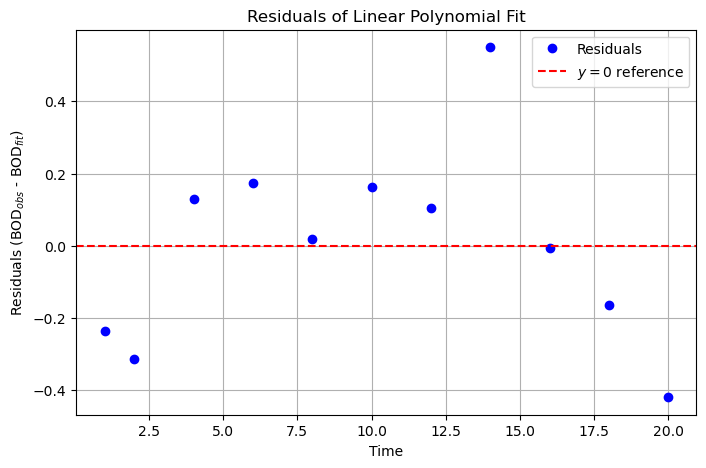

In [7]:
# Compute residuals
B_pred = linear_model(t_data, *popt)
residuals = B_data - B_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.plot(t_data, residuals, 'o', color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='$y=0$ reference')
plt.xlabel('Time')
plt.ylabel('Residuals (BOD$_{obs}$ - BOD$_{fit}$)')
plt.title('Residuals of Linear Polynomial Fit')
plt.grid(True)
plt.legend()
plt.show()